In [5]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

In [2]:
mnist=keras.datasets.mnist
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28,1).astype('float32')
x_train=x_train/255.0
x_test=x_test/255.0
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [6]:
# Load pretrained convnet
model=keras.models.load_model(r"C:\Users\USER\Desktop\inverting convolutional layers\Max pooling\model.pkl")

In [7]:
image=np.expand_dims(x_train[4],axis=0)
image.shape

(1, 28, 28, 1)

In [8]:


occluding_size = 4 
occluding_pixel = 0
occluding_stride = 4

_,height, width,_= image.shape

output_height = int(math.ceil((height-occluding_size)/occluding_stride+1))
output_width = int(math.ceil((width-occluding_size)/occluding_stride+1))

heatmap = np.zeros((output_height, output_width))

for h in range(output_height):
    for w in range(output_width):
        #occluder region
        h_start = h*occluding_stride
        w_start = w*occluding_stride
        h_end = min(height, h_start + occluding_size)
        w_end = min(width, w_start + occluding_size)

        input_image = np.array(image, copy=True) 
        input_image[:,h_start:h_end,w_start:w_end,:] =  occluding_pixel
        probs = model.predict(input_image)[0]
        heatmap[h,w] = probs[9] # the probability of the correct class



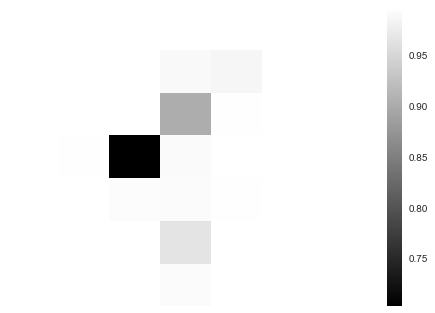

In [13]:
fig = sns.heatmap(heatmap,xticklabels=False, yticklabels=False,cmap="gray")
plt.show()

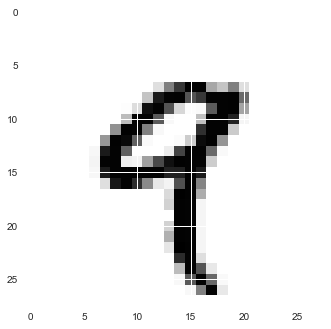

In [14]:
#Original image
fig=plt.imshow(np.squeeze(x_train[4]))
plt.show()